First 5 rows:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

Summary Statistics:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000



Missing Values:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Missing values after converting zeros to NaN:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Missing values after imputation:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Train size: 537
Test size: 231

Ac

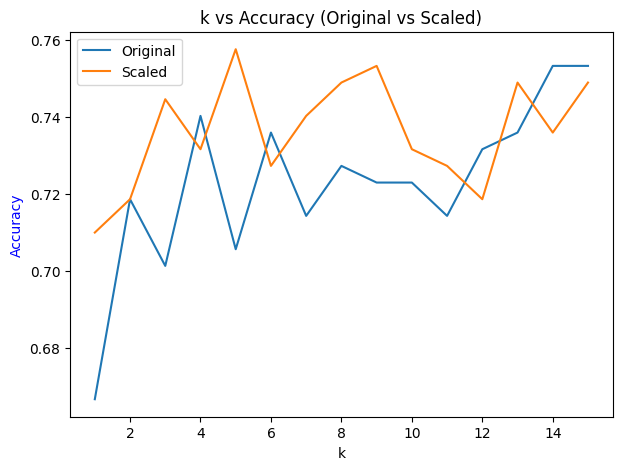

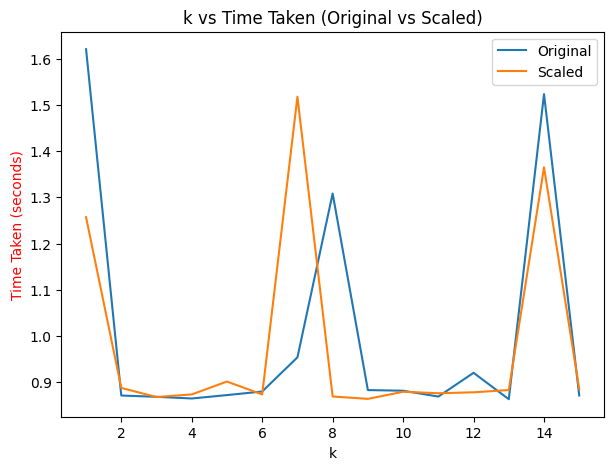

In [13]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt

# 1: Classification task using KNN from scratch

df = pd.read_csv("diabetes_.csv")

print("First 5 rows:")
display(df.head())

print("\nDataset Info:")
print(df.info())

print("\nSummary Statistics:")
display(df.describe())

print("\nMissing Values:")
print(df.isnull().sum())

# Handle missing data

columns_with_zero_missing = [
    "Glucose", "BloodPressure", "SkinThickness",
    "Insulin", "BMI"
]

df[columns_with_zero_missing] = df[columns_with_zero_missing].replace(0, np.nan)

print("\nMissing values after converting zeros to NaN:")
print(df.isnull().sum())

df.fillna(df.mean(), inplace=True)

print("\nMissing values after imputation:")
print(df.isnull().sum())

# Feature Engineering

X = df.drop("Outcome", axis=1).values
y = df["Outcome"].values

def manual_train_test_split(X, y, split_ratio=0.7):
    np.random.seed(42)
    indices = np.arange(len(X))
    np.random.shuffle(indices)

    train_size = int(len(X) * split_ratio)
    train_idx = indices[:train_size]
    test_idx = indices[train_size:]

    return X[train_idx], X[test_idx], y[train_idx], y[test_idx]

X_train, X_test, y_train, y_test = manual_train_test_split(X, y)

print("\nTrain size:", len(X_train))
print("Test size:", len(X_test))

# KNN from scratch

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def knn_single_predict(query, X_train, y_train, k):
    distances = []
    for i in range(len(X_train)):
        dist = euclidean_distance(query, X_train[i])
        distances.append((dist, y_train[i]))

    distances.sort(key=lambda x: x[0])
    k_nearest = distances[:k]

    labels = [label for _, label in k_nearest]
    return max(set(labels), key=labels.count)

def knn_predict(X_test, X_train, y_train, k):
    predictions = []
    for i in range(len(X_test)):
        predictions.append(knn_single_predict(X_test[i], X_train, y_train, k))
    return np.array(predictions)

k = 5
y_pred = knn_predict(X_test, X_train, y_train, k)

accuracy = np.sum(y_pred == y_test) / len(y_test)
print("\nAccuracy on original data:", accuracy)


# 2: Experimentation with Scaling

X_mean = X.mean(axis=0)
X_std = X.std(axis=0)

X_scaled = (X - X_mean) / X_std

X_train_s, X_test_s, y_train_s, y_test_s = manual_train_test_split(X_scaled, y)

y_pred_scaled = knn_predict(X_test_s, X_train_s, y_train_s, k)
scaled_accuracy = np.sum(y_pred_scaled == y_test_s) / len(y_test_s)

print("Accuracy on scaled data:", scaled_accuracy)
print("Original accuracy:", accuracy)
print("Scaled accuracy:", scaled_accuracy)


# 3: Experimentation with k

k_values = list(range(1, 16))

original_accuracy_list = []
scaled_accuracy_list = []
original_time_list = []
scaled_time_list = []

for k in k_values:

    # Original data
    start = time.time()
    preds_o = knn_predict(X_test, X_train, y_train, k)
    end = time.time()

    acc_o = np.sum(preds_o == y_test) / len(y_test)
    t_o = end - start

    original_accuracy_list.append(acc_o)
    original_time_list.append(t_o)

    # Scaled data
    start = time.time()
    preds_s = knn_predict(X_test_s, X_train_s, y_train_s, k)
    end = time.time()

    acc_s = np.sum(preds_s == y_test_s) / len(y_test_s)
    t_s = end - start

    scaled_accuracy_list.append(acc_s)
    scaled_time_list.append(t_s)

print("\nExperimentation with k complete.")

# Plot 1: k vs Accuracy

plt.figure(figsize=(7,5))
plt.plot(k_values, original_accuracy_list)
plt.plot(k_values, scaled_accuracy_list)
plt.xlabel("k")
plt.ylabel("Accuracy", color="blue")
plt.title("k vs Accuracy (Original vs Scaled)")
plt.legend(["Original", "Scaled"])
plt.show()

# Plot 2: k vs Time Taken

plt.figure(figsize=(7,5))
plt.plot(k_values, original_time_list)
plt.plot(k_values, scaled_time_list)
plt.xlabel("k")
plt.ylabel("Time Taken (seconds)", color="red")
plt.title("k vs Time Taken (Original vs Scaled)")
plt.legend(["Original", "Scaled"])
plt.show()
